###  下面进行封装

### knn不需要训练模型的算法，简单

### 在sklearn库中，我们需要训练模型(fit)，得出模型
### 使用sklearn KNN算法

In [1]:
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  
x_train=np.array([        [5.45470151 ,1.71865315],
                 [8.52931809, 1.80223411],
                 [5.8870005 , 1.20774901],
                 [5.5469875 , 0.82026178],
                 [9.92705175, 2.52719261],
                 [5.32960013, 8.92139097],
                 [2.42093626, 4.17620739],
                 [8.67945484 ,2.86330241],
                 [1.37699664, 0.50793602],
                 [9.28290872, 7.79950142],
                ])
y_train=np.array([1, 0 ,1 ,0 ,1, 0, 1, 1, 1, 1])

### 记住，在sklearn 中所有的算法都是类封装的，注意
#### 其中 参数n_neighbors  是K的值，记住

In [2]:
knn_a=KNeighborsClassifier(n_neighbors=6)
print(x_train.shape)
print(y_train.shape)

(10, 2)
(10,)


In [3]:
knn_a.fit(x_train,y_train)      # 需要训练一下模型

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

#### 为了接口一致，所以传入测试点的时候 传入矩阵，记住

In [4]:
x=np.array([
    [2,1]
]).reshape(1,-1)     #原来是 传入二维的矩阵才行的        
knn_a.predict(x)

array([1])

### 测试模型，将数据集分为测试数据，查看模型好坏

In [5]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as ply
from sklearn import datasets 


In [6]:
iris=datasets.load_iris()   #都是 一个对象式的，所以需要创建对

In [7]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [8]:
x=iris.data    
y=iris.target

#### 拆分数据

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

####  x,y是分离的，但是也是一一对应的，我们可以先形成大的矩阵，乱序，然后在分离




In [10]:
np.random.seed(100)
shuffle_index=np.random.permutation(len(x))
print(shuffle_index)

[128  11 118  15 123 135  32   1 116  45  40 115  26  28 145  97  62  77
 122 112 125  31 146  29  69 149  75  20  73 120  81  99 119  12  16  51
  46  89 136 114  41  90 102 109  37   6  25  21  92   9  23  35  54 131
 127  84 111  96 117 110  82  22 139 124 133  33  42 101   5  36  43  52
 104 144 134  10  85  70   3  76  57 126   0  78  88  83  50  68  95 132
 113  13  72  17  74 129 137 106  64  18  44  38  39 121  48  30  56  27
 140  63 141  19 142 105   2  80  71  55 143  61  65  47  49   7 147  59
  91   4 100 108 130  86  93  58  60 107 148  34  14  66  53  98  94 138
  79  87 103  67  24   8]


In [11]:
num=0.2
split_num=int(num*len(x))
print(split_num)

30


In [12]:
text_index=shuffle_index[:split_num]
train_index=shuffle_index[split_num:]
print(text_index)
print(train_index)

print(text_index.shape)
print(train_index.shape)

[128  11 118  15 123 135  32   1 116  45  40 115  26  28 145  97  62  77
 122 112 125  31 146  29  69 149  75  20  73 120]
[ 81  99 119  12  16  51  46  89 136 114  41  90 102 109  37   6  25  21
  92   9  23  35  54 131 127  84 111  96 117 110  82  22 139 124 133  33
  42 101   5  36  43  52 104 144 134  10  85  70   3  76  57 126   0  78
  88  83  50  68  95 132 113  13  72  17  74 129 137 106  64  18  44  38
  39 121  48  30  56  27 140  63 141  19 142 105   2  80  71  55 143  61
  65  47  49   7 147  59  91   4 100 108 130  86  93  58  60 107 148  34
  14  66  53  98  94 138  79  87 103  67  24   8]
(30,)
(120,)


In [13]:
x_train=x[train_index]
y_train=y[train_index]
print(x_train)
print(y_train)

x_text=x[text_index]
y_text=y[text_index]
print(x_text)
print(y_text)

[[5.5 2.4 3.7 1. ]
 [5.7 2.8 4.1 1.3]
 [6.  2.2 5.  1.5]
 [4.8 3.  1.4 0.1]
 [5.4 3.9 1.3 0.4]
 [6.4 3.2 4.5 1.5]
 [5.1 3.8 1.6 0.2]
 [5.5 2.5 4.  1.3]
 [6.3 3.4 5.6 2.4]
 [5.8 2.8 5.1 2.4]
 [4.5 2.3 1.3 0.3]
 [5.5 2.6 4.4 1.2]
 [7.1 3.  5.9 2.1]
 [7.2 3.6 6.1 2.5]
 [4.9 3.6 1.4 0.1]
 [4.6 3.4 1.4 0.3]
 [5.  3.  1.6 0.2]
 [5.1 3.7 1.5 0.4]
 [5.8 2.6 4.  1.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.3 1.7 0.5]
 [5.  3.2 1.2 0.2]
 [6.5 2.8 4.6 1.5]
 [7.9 3.8 6.4 2. ]
 [6.1 3.  4.9 1.8]
 [5.4 3.  4.5 1.5]
 [6.4 2.7 5.3 1.9]
 [5.7 2.9 4.2 1.3]
 [7.7 3.8 6.7 2.2]
 [6.5 3.2 5.1 2. ]
 [5.8 2.7 3.9 1.2]
 [4.6 3.6 1.  0.2]
 [6.9 3.1 5.4 2.1]
 [6.7 3.3 5.7 2.1]
 [6.3 2.8 5.1 1.5]
 [5.5 4.2 1.4 0.2]
 [4.4 3.2 1.3 0.2]
 [5.8 2.7 5.1 1.9]
 [5.4 3.9 1.7 0.4]
 [5.5 3.5 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [6.9 3.1 4.9 1.5]
 [6.5 3.  5.8 2.2]
 [6.7 3.3 5.7 2.5]
 [6.1 2.6 5.6 1.4]
 [5.4 3.7 1.5 0.2]
 [6.  3.4 4.5 1.6]
 [5.9 3.2 4.8 1.8]
 [4.6 3.1 1.5 0.2]
 [6.8 2.8 4.8 1.4]
 [4.9 2.4 3.3 1. ]
 [6.2 2.8 4.8 1.8]
 [5.1 3.5 1.

#### 使用算法来分出




##  导出文件的时候， 一定要复制出文件的路径，才能导出来

In [14]:
import numpy as np
import sklearn
%run D:/pycharm/untitled/KNN/knn.py     

ERROR:root:File `'D:/pycharm/untitled/KNN/knn.py'` not found.


In [15]:
x_train=[[3.393533211,2.331273381],
         [3.110073483,1.781539638],
         [1.343808831,3.368360954],
         [3.582294042,4.679179110],
         [2.280362439,2.866990263],
         [7.423436942,4.696522875],
         [5.745051997,3.533989803],
         [9.172168622,2.511101045],
         [7.792783481,3.424088941],
         [7.939820817,0.791637231]
        ]
y_train=[0,0,0,0,0,1,1,1,1,1]
x=np.array([8.093607318,3.365731514])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [16]:
print(x_train)
print(y_train)


[[3.39353321 2.33127338]
 [3.11007348 1.78153964]
 [1.34380883 3.36836095]
 [3.58229404 4.67917911]
 [2.28036244 2.86699026]
 [7.42343694 4.69652288]
 [5.745052   3.5339898 ]
 [9.17216862 2.51110105]
 [7.79278348 3.42408894]
 [7.93982082 0.79163723]]
[0 0 0 0 0 1 1 1 1 1]


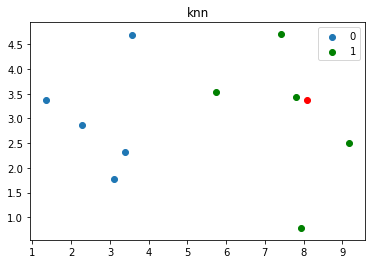

In [17]:
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],label='0')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color="green",label='1')
plt.legend()
plt.title('knn')
plt.scatter(x[0],x[1],color='red')
plt.show()

In [18]:
knn(x_train,y_train,x,6)

NameError: name 'knn' is not defined

In [ ]:
b=knnclassify(6,None)


In [ ]:
b.fit(x_train,y_train)


###  上面就是 自己写的类，但是没有分离出 测试集
### 现在就是 使用自己的  全部代码

In [ ]:
%run D:/pycharm/untitled/KNN/knn.py 

### 得出正确率是多少

In [ ]:
#sum(a==b)




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=iris.data
y=iris.target
print(x)
print(y)

### 下面的书写格式不能错误，其中有一定的顺序

In [ ]:
x_train,x_text, y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_text.shape)
print(y_train.shape)
print(y_text.shape)

In [ ]:
knn_a=KNeighborsClassifier(n_neighbors=6)
knn_a.fit(x_train,y_train)

In [ ]:
ans=knn_a.predict(x_text)
print(ans)
sum(ans==y_text)/len(y_text)


In [23]:

iris=datasets.load_iris()
iris.data


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])